In [27]:
    sigma_q = sigma[0]
    sigma_r = sigma[1] 
    np.random.seed(0)
    A = np.array([[0.9, 0.1], [0.3, 0.65]])
    C = np.array([[1.1, 0.2], [0.1, 0.95]])
    Q = sigma_q * np.eye(2)
    R = 0.01 * np.eye(2)
    obs = np.zeros([20, 2])
    z = np.zeros([21, 2])
    mu_f = np.zeros([21, 2])
    cov_f = np.zeros([21, 2, 2])
    mu_s = np.zeros([20, 2])
    cov_s = np.zeros([20, 2, 2])
    mu_t = np.zeros([20, 2])
    cov_t = np.zeros([20, 2, 2])
    mu_f[0, :] = np.array([0, 0])
    cov_f[0, :, :] = np.eye(2) 
    z[0, :] = np.random.multivariate_normal(mu_f[0,:], cov_f[0,:,:])
    for t in range(20):
        z[t+1, :] = np.dot(A, z[t, :]) +\
                    np.random.multivariate_normal([0,0], Q)
        obs[t, :] = np.dot(C, z[t+1, :]) +\
                    np.random.multivariate_normal([0,0], R) 

In [25]:
R

array([[0.0001, 0.    ],
       [0.    , 0.0001]])

In [24]:
z

array([[ 1.76405235,  0.40015721],
       [ 2.24667108,  2.20658319],
       [ 2.84355097,  2.0125537 ],
       [ 2.8515524 ,  3.08098852],
       [ 3.15521977,  3.06914243],
       [ 3.34461343,  2.40133093],
       [ 3.79700264,  2.09486276],
       [ 3.65572888,  2.38237613],
       [ 3.62639096,  2.88443412],
       [ 3.33215631,  3.06168324],
       [ 3.06014202,  2.79854795],
       [ 1.95484259,  3.97087746],
       [ 1.36410872,  3.6592512 ],
       [ 1.02728019,  3.03244452],
       [ 1.20997262,  2.55017386],
       [ 0.94281222,  1.79118714],
       [ 0.51337085,  0.35531832],
       [-0.53346237,  0.67765736],
       [ 0.04876697,  0.36201453],
       [ 0.33455492, -0.18317239],
       [ 0.08573907,  0.0168265 ]])

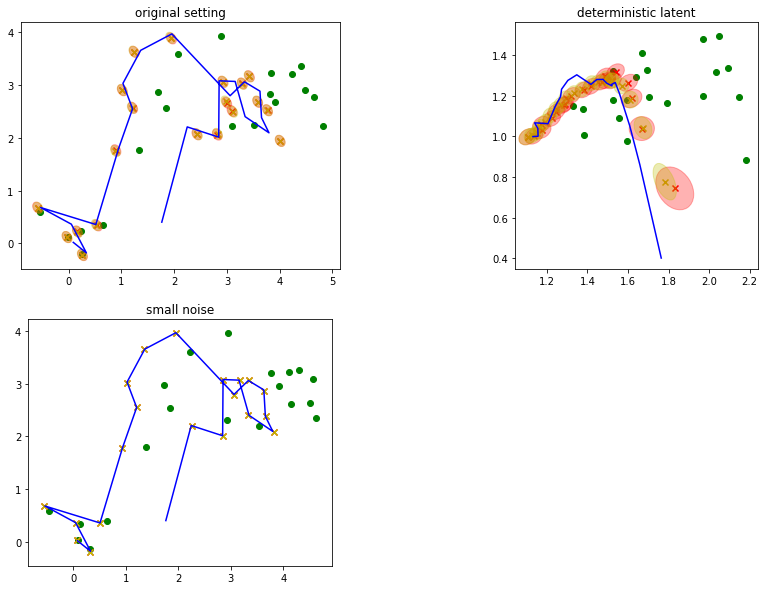

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse
plt.figure(figsize=(15,10))
k = 0
title = ['original setting', 
        'deterministic latent',
        'small noise']
for sigma in [(0.4,0.01),(0.0001, 0.01),(0.4, 0.0001)]:
    k += 1
    sigma_q = sigma[0]
    sigma_r = sigma[1] 
    np.random.seed(0)
    A = np.array([[0.9, 0.1], [0.3, 0.65]])
    C = np.array([[1.1, 0.2], [0.1, 0.95]])
    Q = sigma_q * np.eye(2)
    R = sigma_r * np.eye(2)
    obs = np.zeros([20, 2])
    z = np.zeros([21, 2])
    mu_f = np.zeros([21, 2])
    cov_f = np.zeros([21, 2, 2])
    mu_s = np.zeros([20, 2])
    cov_s = np.zeros([20, 2, 2])
    mu_t = np.zeros([20, 2])
    cov_t = np.zeros([20, 2, 2])
    mu_f[0, :] = np.array([0, 0])
    cov_f[0, :, :] = np.eye(2) 
    z[0, :] = np.random.multivariate_normal(mu_f[0,:], cov_f[0,:,:])
    for t in range(20):
        z[t+1, :] = np.dot(A, z[t, :]) +\
                    np.random.multivariate_normal([0,0], Q)
        obs[t, :] = np.dot(C, z[t+1, :]) +\
                    np.random.multivariate_normal([0,0], R) 
    for t in range(20):
        mu_t[t] = np.dot(A, mu_f[t, :])
        cov_t[t] = np.dot(np.dot(A, cov_f[t, :, :]), A.T) + Q
        K = np.dot(C, np.dot(cov_t[t], C.T)) + R
        K = np.dot(np.dot(cov_t[t], C.T), np.linalg.inv(K))
        mu_f[t+1, :] = mu_t[t] + np.dot(K, obs[t,:] - np.dot(C, mu_t[t]))
        cov_f[t+1, :, :] = cov_t[t] - np.dot(np.dot(K, C), cov_t[t])
    mu_s[19] = mu_f[-1]
    cov_s[19] = cov_f[-1]
    for t in range(19, 0, -1):
        F = np.dot(np.dot(cov_f[t], A.T), np.linalg.inv(cov_t[t]))
        mu_s[t-1] = mu_f[t] + np.dot(F, (mu_s[t]-mu_t[t]))
        cov_s[t-1] = np.dot(np.dot(F, cov_s[t]-cov_t[t]), F.T) +cov_f[t] 
    
    a = plt.subplot(220+k, aspect='equal')
    plt.plot(z[:,0], z[:,1], color = "b")
    plt.scatter(obs[:,0], obs[:,1], color = "g")
    plt.scatter(mu_f[1:,0], mu_f[1:,1], color = "r", marker="x")
    plt.scatter(mu_s[:,0], mu_s[:,1], color = "y", marker="x")
    for i in range(20):
        v, w = np.linalg.eigh(cov_f[i+1])
        v = 2 * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0]) 
        angle = np.arctan(u[1] / u[0]) 
        angle = 180 * angle / np.pi 
        currEllipse = Ellipse(mu_f[i+1], 
                              v[0], 
                              v[1], 
                              180 + angle, 
                              color='r') 
        currEllipse.set_alpha(0.3) 
        a.add_artist(currEllipse) 
    for i in range(20):
        v, w = np.linalg.eigh(cov_s[i])
        v = 2 * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0]) 
        angle = np.arctan(u[1] / u[0]) 
        angle = 180 * angle / np.pi 
        currEllipse = Ellipse(mu_s[i], 
                              v[0], 
                              v[1], 
                              180 + angle, 
                              color='y') 
        currEllipse.set_alpha(0.3) 
        a.add_artist(currEllipse)
    plt.title(title[k-1])
#plt.savefig("Q1.pdf")
plt.show()

In [55]:
mu_f

array([[0.        , 0.        ],
       [1.80907091, 0.69668685],
       [1.63937428, 0.99725813],
       [1.5776955 , 1.14215939],
       [1.54539914, 1.22051872],
       [1.47078834, 1.22965659],
       [1.45964676, 1.24616512],
       [1.45745305, 1.26382553],
       [1.41364888, 1.23694492],
       [1.40944104, 1.23960975],
       [1.3733728 , 1.21208145],
       [1.3493501 , 1.19367614],
       [1.31919061, 1.17039283],
       [1.29483844, 1.14807711],
       [1.2816215 , 1.13644493],
       [1.25998651, 1.11770589],
       [1.2434823 , 1.10195252],
       [1.22086565, 1.08354696],
       [1.2089342 , 1.06942647],
       [1.18584936, 1.05042005],
       [1.16748677, 1.0368538 ]])

In [22]:
obs[0]

array([2.93133041, 2.31114836])

In [37]:
F = np.dot(np.dot(cov_f[-2],A.T),np.linalg.inv(cov_t[-1]))

In [39]:
t=19
np.dot(np.dot(cov_f[t], A.T), np.linalg.inv(cov_t[t]))

array([[ 0.01867004,  0.00185116],
       [-0.00359143,  0.01600535]])

In [44]:
mu_f[-1]+np.dot(F, (mu_s[-1]-mu_t[-1]))

array([-0.03726172,  0.12155978])

In [46]:
mu_f

array([[ 0.        ,  0.        ],
       [ 2.43028507,  2.06822559],
       [ 2.81655304,  2.06113272],
       [ 2.92228402,  3.06274317],
       [ 3.29108514,  3.0305127 ],
       [ 3.09561982,  2.50802424],
       [ 4.00964497,  1.94164243],
       [ 3.7702761 ,  2.52319288],
       [ 3.58346646,  2.68260323],
       [ 3.42680845,  3.16817729],
       [ 2.99644093,  2.66548822],
       [ 1.94796306,  3.88522689],
       [ 1.24243535,  3.63048782],
       [ 1.01455116,  2.9023613 ],
       [ 1.21287173,  2.57113   ],
       [ 0.89547791,  1.76357977],
       [ 0.53937355,  0.33810755],
       [-0.59183194,  0.67534535],
       [ 0.16428613,  0.22415145],
       [ 0.26002217, -0.22408445],
       [-0.03303725,  0.11771435]])

In [34]:
mu_f

array([[ 0.        ,  0.        ],
       [ 2.43028507,  2.06822559],
       [ 2.81655304,  2.06113272],
       [ 2.92228402,  3.06274317],
       [ 3.29108514,  3.0305127 ],
       [ 3.09561982,  2.50802424],
       [ 4.00964497,  1.94164243],
       [ 3.7702761 ,  2.52319288],
       [ 3.58346646,  2.68260323],
       [ 3.42680845,  3.16817729],
       [ 2.99644093,  2.66548822],
       [ 1.94796306,  3.88522689],
       [ 1.24243535,  3.63048782],
       [ 1.01455116,  2.9023613 ],
       [ 1.21287173,  2.57113   ],
       [ 0.89547791,  1.76357977],
       [ 0.53937355,  0.33810755],
       [-0.59183194,  0.67534535],
       [ 0.16428613,  0.22415145],
       [ 0.26002217, -0.22408445],
       [-0.03303725,  0.11771435]])

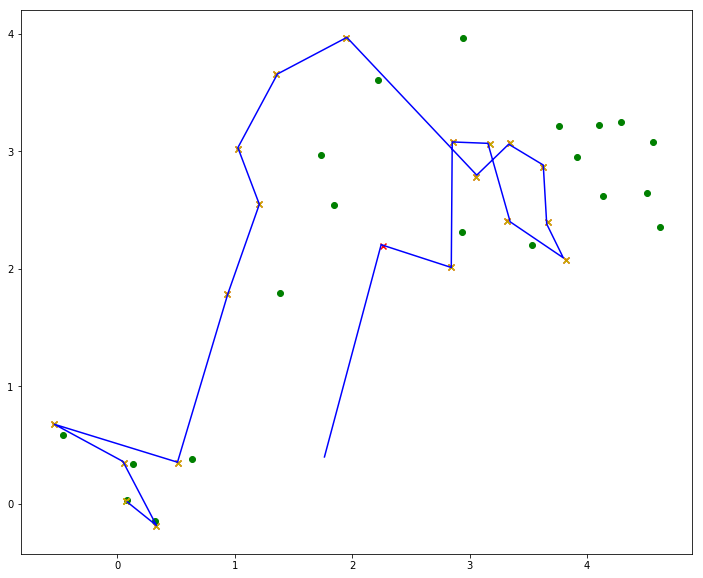

In [52]:
np.random.seed(0)
A = np.array([[0.9, 0.1], [0.3, 0.65]])
C = np.array([[1.1, 0.2], [0.1, 0.95]])
sigma_q = 0.4
sigma_r = 0.0001
Q = sigma_q * np.eye(2)
R = sigma_r * np.eye(2)
obs = np.zeros([20, 2])
z = np.zeros([21, 2])
mu_f = np.zeros([21, 2])
cov_f = np.zeros([21, 2, 2])
mu_s = np.zeros([20, 2])
cov_s = np.zeros([20, 2, 2])
mu_t = np.zeros([20, 2])
cov_t = np.zeros([20, 2, 2])
mu_f[0, :] = np.array([0, 0])
cov_f[0, :, :] = np.eye(2) 
z[0, :] = np.random.multivariate_normal(mu_f[0,:], cov_f[0,:,:])
for t in range(20):
    z[t+1, :] = np.dot(A, z[t, :]) + np.random.multivariate_normal([0,0], Q)
    obs[t, :] = np.dot(C, z[t+1, :]) + np.random.multivariate_normal([0,0], R) 
for t in range(20):
    mu_t[t] = np.dot(A, mu_f[t, :])
    cov_t[t] = np.dot(np.dot(A, cov_f[t, :, :]), A.T) + Q
    K = np.dot(C, np.dot(cov_t[t], C.T)) + R
    K = np.dot(np.dot(cov_t[t], C.T), np.linalg.inv(K))
    mu_f[t+1, :] = mu_t[t] + np.dot(K, obs[t,:] - np.dot(C, mu_t[t]))
    cov_f[t+1, :, :] = cov_t[t] - np.dot(np.dot(K, C), cov_t[t])
mu_s[19] = mu_f[20]
cov_s[19] = cov_f[20]
for t in range(19, 0, -1):
    F = np.dot(np.dot(cov_f[t], A.T), np.linalg.inv(cov_t[t]))
    mu_s[t-1] = mu_f[t+1] + np.dot(F, (mu_s[t]-mu_t[t]))
    cov_s[t-1] = np.dot(np.dot(F, cov_s[t]-cov_t[t]), F.T) + cov_f[t+1]
plt.figure(figsize=(15,10))
a = plt.subplot(111, aspect='equal')
plt.plot(z[:,0], z[:,1], color = "b")
plt.scatter(obs[:,0], obs[:,1], color = "g")
plt.scatter(mu_f[1:,0], mu_f[1:,1], color = "r", marker="x")
plt.scatter(mu_s[:,0], mu_s[:,1], color = "y", marker="x")
for i in range(20):
    v, w = np.linalg.eigh(cov_f[i+1])
    v = 2 * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0]) 
    angle = np.arctan(u[1] / u[0]) 
    angle = 180 * angle / np.pi 
    currEllipse = Ellipse(mu_f[i+1], v[0], v[1], 180 + angle, color='r') 
    currEllipse.set_alpha(0.3) 
    a.add_artist(currEllipse)
for i in range(20):
    v, w = np.linalg.eigh(cov_s[i])
    v = 2 * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0]) 
    angle = np.arctan(u[1] / u[0]) 
    angle = 180 * angle / np.pi 
    currEllipse = Ellipse(mu_s[i], v[0], v[1], 180 + angle, color='y') 
    currEllipse.set_alpha(0.3) 
    a.add_artist(currEllipse)
plt.savefig("p2.pdf")
plt.show()

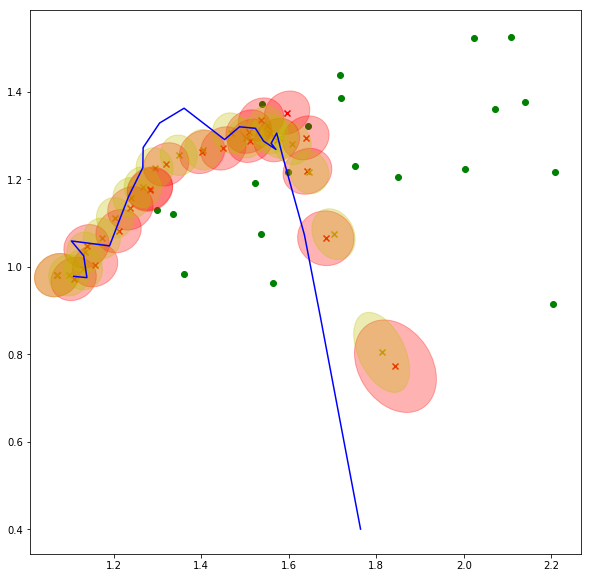

In [48]:
np.random.seed(0)
A = np.array([[0.9, 0.1], [0.3, 0.65]])
C = np.array([[1.1, 0.2], [0.1, 0.95]])
sigma_q = 0.002
sigma_r = 0.01
Q = sigma_q * np.eye(2)
R = sigma_r * np.eye(2)
obs = np.zeros([20, 2])
z = np.zeros([21, 2])
mu_f = np.zeros([21, 2])
cov_f = np.zeros([21, 2, 2])
mu_s = np.zeros([20, 2])
cov_s = np.zeros([20, 2, 2])
mu_t = np.zeros([20, 2])
cov_t = np.zeros([20, 2, 2])
mu_f[0, :] = np.array([0, 0])
cov_f[0, :, :] = np.eye(2) 
z[0, :] = np.random.multivariate_normal(mu_f[0,:], cov_f[0,:,:])
for t in range(20):
    z[t+1, :] = np.dot(A, z[t, :]) + np.random.multivariate_normal([0,0], Q)
    obs[t, :] = np.dot(C, z[t+1, :]) + np.random.multivariate_normal([0,0], R) 
for t in range(20):
    mu_t[t] = np.dot(A, mu_f[t, :])
    cov_t[t] = np.dot(np.dot(A, cov_f[t, :, :]), A.T) + Q
    K = np.dot(C, np.dot(cov_t[t], C.T)) + R
    K = np.dot(np.dot(cov_t[t], C.T), np.linalg.inv(K))
    mu_f[t+1, :] = mu_t[t] + np.dot(K, obs[t,:] - np.dot(C, mu_t[t]))
    cov_f[t+1, :, :] = cov_t[t] - np.dot(np.dot(K, C), cov_t[t])
mu_s[19] = mu_f[20]
cov_s[19] = cov_f[20]
for t in range(19, 0, -1):
    F = np.dot(np.dot(cov_f[t], A.T), np.linalg.inv(cov_t[t]))
    mu_s[t-1] = mu_f[t] + np.dot(F, (mu_s[t]-mu_t[t]))
    cov_s[t-1] = np.dot(np.dot(F, cov_s[t]-cov_t[t]), F.T) + cov_f[t]
plt.figure(figsize=(15,10))
a = plt.subplot(111, aspect='equal')
plt.plot(z[:,0], z[:,1], color = "b")
plt.scatter(obs[:,0], obs[:,1], color = "g")
plt.scatter(mu_f[1:,0], mu_f[1:,1], color = "r", marker="x")
plt.scatter(mu_s[:,0], mu_s[:,1], color = "y", marker="x")
for i in range(20):
    v, w = np.linalg.eigh(cov_f[i+1])
    v = 2 * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0]) 
    angle = np.arctan(u[1] / u[0]) 
    angle = 180 * angle / np.pi 
    currEllipse = Ellipse(mu_f[i+1], v[0], v[1], 180 + angle, color='r') 
    currEllipse.set_alpha(0.3) 
    a.add_artist(currEllipse)
for i in range(20):
    v, w = np.linalg.eigh(cov_s[i])
    v = 2 * np.sqrt(v)
    
    u = w[0] / np.linalg.norm(w[0]) 
    angle = np.arctan(u[1] / u[0]) 
    angle = 180 * angle / np.pi 
    currEllipse = Ellipse(mu_s[i], v[0], v[1], 180 + angle, color='y') 
    currEllipse.set_alpha(0.3) 
    a.add_artist(currEllipse)
plt.savefig("p3.pdf")
plt.show()

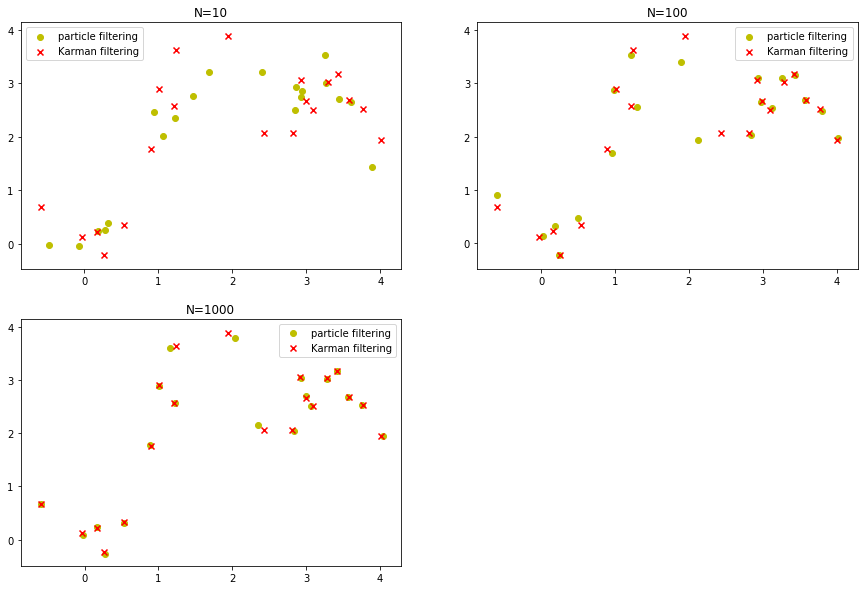

In [295]:
from scipy.stats import multivariate_normal
plt.figure(figsize=(15,10))
k = 0
for N in [10, 100, 1000]:
    k += 1
    np.random.seed(0)
    z = np.zeros([21, 2])
    obs = np.zeros([20, 2])
    A = np.array([[0.9, 0.1], [0.3, 0.65]])
    C = np.array([[1.1, 0.2], [0.1, 0.95]])
    z[0, :] = np.random.multivariate_normal([0,0], np.eye(2))
    sigma_q = 0.4
    sigma_r = 0.01
    Q = sigma_q * np.eye(2)
    R = sigma_r * np.eye(2)   
    for t in range(20):
        z[t+1, :] = np.dot(A, z[t, :]) + np.random.multivariate_normal([0,0], Q)
        obs[t, :] = np.dot(C, z[t+1, :]) + np.random.multivariate_normal([0,0], R) 
  
    z_sample = np.zeros([N,2])
    weight = np.zeros(N)
    z_sample_new = z_sample
    mean = np.zeros([20,2])
    for i in range(N):
        tmp =  np.random.multivariate_normal([0,0], np.eye(2))
        z_sample[i] = np.random.multivariate_normal(np.dot(A, tmp), Q)
        weight[i] = multivariate_normal.pdf(obs[0],np.dot(C,z_sample[i]),R)
    weight /= sum(weight)
    w = np.random.choice(a=N, size=N, replace=True, p=weight)
    mean[0] = np.dot(weight, z_sample)
    for t in range(1, 20):
        for i in range(N):
            z_sample_new[i] = np.random.multivariate_normal(np.dot(A, z_sample[w[i]]), Q)
            weight[i] = multivariate_normal.pdf(obs[t],np.dot(C,z_sample_new[i]),R)
        weight /= sum(weight)
        w = np.random.choice(a=N, size=N, replace=True, p=weight)
        z_sample = z_sample_new
        mean[t] = np.dot(weight, z_sample)
    plt.subplot(220+k)
    plt.scatter(mean[:,0], mean[:,1],color="y", label="particle filtering")
    plt.scatter(mu_f[1:,0], mu_f[1:,1],color="r", label="Karman filtering", marker = "x")
    plt.legend()
    plt.title("N={}".format(N))
plt.savefig("C:/Users/gong/Documents/learning/TSA/Untitled Folder/Q4.pdf")
plt.show()